In [1]:
import pandas as pd

In [ ]:
!pip install plotly

In [9]:
df = pd.read_csv('Book112.csv')

In [10]:
df.head(10)

,Unnamed: 0,origin,destination,train_type,price,train_class,fare
0,706.0,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo
1,1056.0,MADRID,VALENCIA,AVE,21.95,Turista,Promo
2,1057.0,MADRID,VALENCIA,AVE,39.45,Turista,Promo
3,1058.0,MADRID,VALENCIA,AVE,21.95,Turista,Promo
4,1060.0,MADRID,VALENCIA,AVE,33.65,Turista,Promo
5,1062.0,MADRID,VALENCIA,AVE,45.30,Turista,Promo
6,1063.0,MADRID,VALENCIA,AVE-MD,71.00,Turista con enlace,Flexible
7,1064.0,MADRID,VALENCIA,AVE,45.30,Turista,Promo
8,1066.0,MADRID,VALENCIA,AVE-LD,56.10,Turista con enlace,Flexible
9,1070.0,MADRID,VALENCIA,AVE,51.15,Turista,Promo


In [11]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [12]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets

# Read the CSV file into a DataFrame
df = pd.read_csv('Book112.csv')

# Handle NaN values in 'price' column
df['price'].fillna(0, inplace=True)  # Replace NaN values with 0, you can choose another strategy based on your data

# Animated graph - Train Types over Time
animated_train_types = px.scatter(df, x='origin', y='destination', animation_frame='train_type',
                                   color='train_type', hover_data=['train_class', 'fare'],
                                   title='Animated Graph - Train Types over Time')
animated_train_types.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                                      buttons=[dict(label='Play',
                                                                    method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)]),
                                                               dict(label='Pause',
                                                                    method='animate', args=[[None], dict(frame=dict(duration=0, redraw=True), mode='immediate', transition=dict(duration=0))])])])

# Animated graph - Price Distribution over Time
animated_price_distribution = px.histogram(df, x='price', animation_frame='train_type',
                                          color='train_type', title='Animated Price Distribution over Time')

# Dynamic graph function - Origin vs Destination
def dynamic_origin_destination(train_type):
    filtered_data = df[df['train_type'] == train_type]
    
    fig = px.scatter(filtered_data, x='origin', y='destination',
                     color='train_type', size='price',
                     hover_data=['train_class', 'fare'],
                     title=f'Dynamic Graph - {train_type} Trains: Origin vs Destination')
    fig.show()

# Dynamic graph function - Train Class Distribution
def dynamic_train_class_distribution(train_type):
    filtered_data = df[df['train_type'] == train_type]
    
    fig = px.histogram(filtered_data, x='train_class',
                       color='train_class',
                       title=f'Dynamic Train Class Distribution for {train_type} Trains')
    fig.show()

# Interactive widgets for dynamic graphs
train_type_widget_1 = widgets.Dropdown(
    options=list(df['train_type'].unique()),
    value=df['train_type'].iloc[0],
    description='Train Type (Graph 1)'
)

train_type_widget_2 = widgets.Dropdown(
    options=list(df['train_type'].unique()),
    value=df['train_type'].iloc[0],
    description='Train Type (Graph 2)'
)

interact(dynamic_origin_destination, train_type=train_type_widget_1)
interact(dynamic_train_class_distribution, train_type=train_type_widget_2)

# Show the graphs
animated_train_types.show()
animated_price_distribution.show()


interactive(children=(Dropdown(description='Train Type', options=('ALVIA', 'AVE', 'AVE-MD', 'AVE-LD', 'AV City…

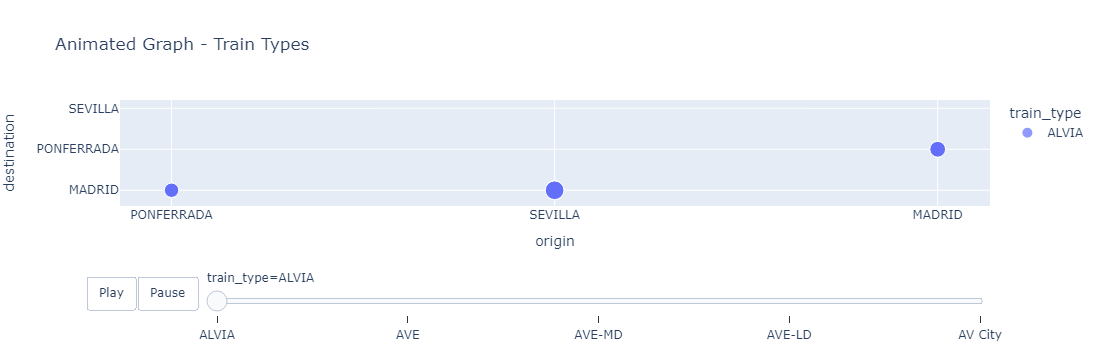

In [13]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets

# Read the CSV file into a DataFrame
df = pd.read_csv('Book112.csv')

# Handle NaN values in 'price' column
df['price'].fillna(0, inplace=True)  # Replace NaN values with 0, you can choose another strategy based on your data

# Animated graph
animated_fig = px.scatter(df, x='origin', y='destination', animation_frame='train_type',
                          color='train_type', size='price', hover_data=['train_class', 'fare'],
                          title='Animated Graph - Train Types')
animated_fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                              buttons=[dict(label='Play',
                                                            method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)]),
                                                       dict(label='Pause',
                                                            method='animate', args=[[None], dict(frame=dict(duration=0, redraw=True), mode='immediate', transition=dict(duration=0))])])])

# Dynamic graph function
def dynamic_graph(train_type):
    filtered_data = df[df['train_type'] == train_type]
    
    fig = px.scatter(filtered_data, x='origin', y='destination',
                     color='train_type', size='price',
                     hover_data=['train_class', 'fare'],
                     title=f'Dynamic Graph - {train_type} Trains')
    fig.show()

# Interactive widgets for dynamic graph
train_type_widget = widgets.Dropdown(
    options=list(df['train_type'].unique()),
    value=df['train_type'].iloc[0],
    description='Train Type'
)

interact(dynamic_graph, train_type=train_type_widget)
animated_fig.show()


interactive(children=(Dropdown(description='Train Type (Graph 3)', options=('ALVIA', 'AVE', 'AVE-MD', 'AVE-LD'…

interactive(children=(Dropdown(description='Train Type (Graph 4)', options=('ALVIA', 'AVE', 'AVE-MD', 'AVE-LD'…

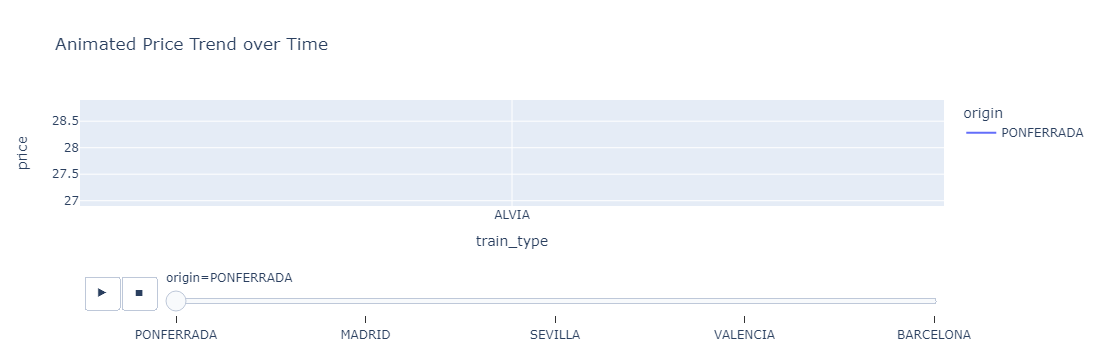

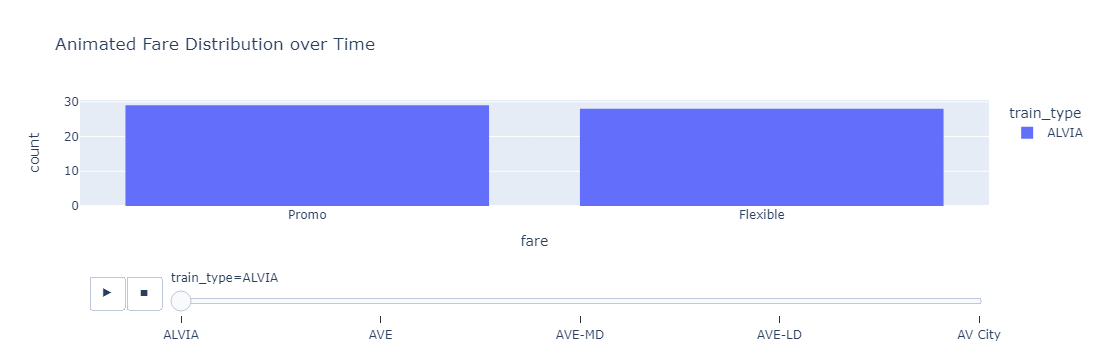

In [14]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets

# Read the CSV file into a DataFrame
df = pd.read_csv('Book112.csv')

# Handle NaN values in 'price' column
df['price'].fillna(0, inplace=True)  # Replace NaN values with 0, you can choose another strategy based on your data

# Animated graph - Price Trend over Time
animated_price_trend = px.line(df, x='train_type', y='price', animation_frame='origin',
                               color='origin', title='Animated Price Trend over Time')

# Animated graph - Fare Distribution over Time
animated_fare_distribution = px.histogram(df, x='fare', animation_frame='train_type',
                                          color='train_type', title='Animated Fare Distribution over Time')

# Dynamic graph function - Train Class vs Price
def dynamic_train_class_vs_price(train_type):
    filtered_data = df[df['train_type'] == train_type]
    
    fig = px.scatter(filtered_data, x='train_class', y='price',
                     color='train_class', size='price',
                     hover_data=['origin', 'destination', 'fare'],
                     title=f'Dynamic Graph - {train_type} Trains: Train Class vs Price')
    fig.show()

# Dynamic graph function - Fare Distribution for a specific Train Type
def dynamic_fare_distribution(train_type):
    filtered_data = df[df['train_type'] == train_type]
    
    fig = px.histogram(filtered_data, x='fare',
                       color='fare',
                       title=f'Dynamic Fare Distribution for {train_type} Trains')
    fig.show()

# Interactive widgets for dynamic graphs
train_type_widget_3 = widgets.Dropdown(
    options=list(df['train_type'].unique()),
    value=df['train_type'].iloc[0],
    description='Train Type (Graph 3)'
)

train_type_widget_4 = widgets.Dropdown(
    options=list(df['train_type'].unique()),
    value=df['train_type'].iloc[0],
    description='Train Type (Graph 4)'
)

interact(dynamic_train_class_vs_price, train_type=train_type_widget_3)
interact(dynamic_fare_distribution, train_type=train_type_widget_4)

# Show the graphs
animated_price_trend.show()
animated_fare_distribution.show()


interactive(children=(Dropdown(description='Train Type (Graph 1)', options=('ALVIA', 'AVE', 'AVE-MD', 'AVE-LD'…

interactive(children=(Dropdown(description='Train Type (Graph 2)', options=('ALVIA', 'AVE', 'AVE-MD', 'AVE-LD'…

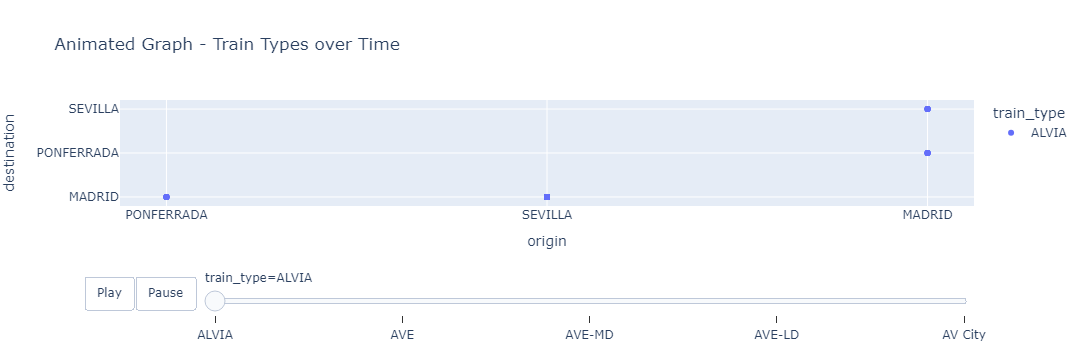

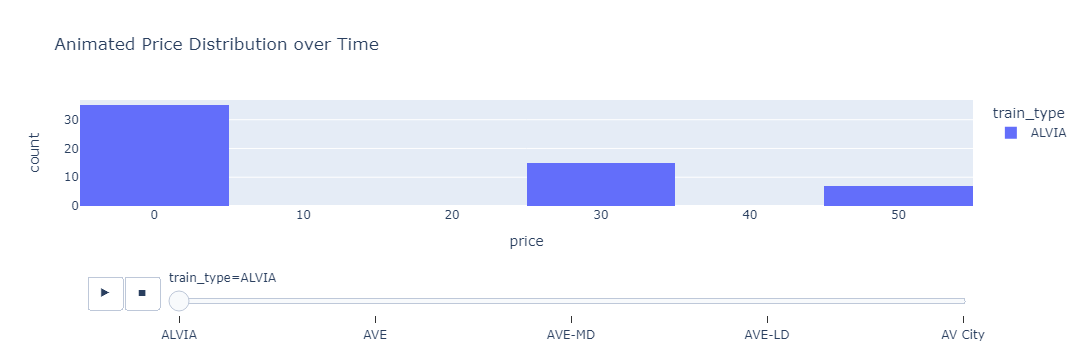

In [15]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets

# Read the CSV file into a DataFrame
df = pd.read_csv('Book112.csv')

# Handle NaN values in 'price' column
df['price'].fillna(0, inplace=True)  # Replace NaN values with 0, you can choose another strategy based on your data
# Animated graph - Train Types over Time
animated_train_types = px.scatter(df, x='origin', y='destination', animation_frame='train_type',
                                   color='train_type', hover_data=['train_class', 'fare'],
                                   title='Animated Graph - Train Types over Time')
animated_train_types.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                                      buttons=[dict(label='Play',
                                                                    method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)]),
                                                               dict(label='Pause',
                                                                    method='animate', args=[[None], dict(frame=dict(duration=0, redraw=True), mode='immediate', transition=dict(duration=0))])])])

# Animated graph - Price Distribution over Time
animated_price_distribution = px.histogram(df, x='price', animation_frame='train_type',
                                          color='train_type', title='Animated Price Distribution over Time')

# Dynamic graph function - Origin vs Destination
def dynamic_origin_destination(train_type):
    filtered_data = df[df['train_type'] == train_type]
    
    fig = px.scatter(filtered_data, x='origin', y='destination',
                     color='train_type', size='price',
                     hover_data=['train_class', 'fare'],
                     title=f'Dynamic Graph - {train_type} Trains: Origin vs Destination')
    fig.show()

# Dynamic graph function - Train Class Distribution
def dynamic_train_class_distribution(train_type):
    filtered_data = df[df['train_type'] == train_type]
    
    fig = px.histogram(filtered_data, x='train_class',
                       color='train_class',
                       title=f'Dynamic Train Class Distribution for {train_type} Trains')
    fig.show()

# Interactive widgets for dynamic graphs
train_type_widget_1 = widgets.Dropdown(
    options=list(df['train_type'].unique()),
    value=df['train_type'].iloc[0],
    description='Train Type (Graph 1)'
)

train_type_widget_2 = widgets.Dropdown(
    options=list(df['train_type'].unique()),
    value=df['train_type'].iloc[0],
    description='Train Type (Graph 2)'
)

interact(dynamic_origin_destination, train_type=train_type_widget_1)
interact(dynamic_train_class_distribution, train_type=train_type_widget_2)

# Show the graphs
animated_train_types.show()
animated_price_distribution.show()


Dynamic Graph - Origin vs Destination:
Interactive scatter plot allowing exploration of the relationship between origin and destination for a selected train type.
Insights: Investigates how the origin and destination vary for specific train types dynamically.
Dynamic Graph - Train Class vs Price:
Interactive scatter plot revealing the relationship between train class and price for a selected train type.
Insights: Explores how prices differ across train classes for a specific train type dynamically.
Dynamic Graph - Fare Distribution:
Interactive histogram displaying the distribution of fares for a selected train type.
Insights: Analyzes the fare distribution characteristics for a specific train type dynamically.
3. Summary:
The animated graphs provide a time-based perspective on the distribution of train types, price trends, and fare distribution.
The dynamic graphs offer interactive exploration of relationships between origin and destination, train class and price, and fare distribution for specific train types.

In [ ]:
#report of the above graph
#1. Animated Graphs:
Train Types over Time:
Animated scatter plot showing the distribution of train types over time.
Insights: Observes how the distribution of train types evolves over the specified time period.
Price Trend over Time:
Animated line graph illustrating the trend of prices for each train type over time.
Insights: Visualizes the price trend and identifies patterns or fluctuations.
Fare Distribution over Time:
Animated histogram showcasing the distribution of fares for each train type over time.
Insights: Examines the variation in fare distribution across different train types.
2. Dynamic Graphs:
Dynamic Graph - Origin vs Destination:
Interactive scatter plot allowing exploration of the relationship between origin and destination for a selected train type.
Insights: Investigates how the origin and destination vary for specific train types dynamically.
Dynamic Graph - Train Class vs Price:
Interactive scatter plot revealing the relationship between train class and price for a selected train type.
Insights: Explores how prices differ across train classes for a specific train type dynamically.
Dynamic Graph - Fare Distribution:
Interactive histogram displaying the distribution of fares for a selected train type.
Insights: Analyzes the fare distribution characteristics for a specific train type dynamically.
3. Summary:
The animated graphs provide a time-based perspective on the distribution of train types, price trends, and fare distribution.
The dynamic graphs offer interactive exploration of relationships between origin and destination, train class and price, and fare distribution for specific train types.


In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [ ]:
pip install jupyterlab-plotly